In [302]:
import matplotlib.pylab as plt
import numpy as np
import scipy.signal

In [51]:
def readctefile(filename):
    cte = []; steer = []
    with open(filename) as f:
        for l in f:
            l = l.strip().split()
            if l[0] == 'CTE:': cte.append(float(l[1])); steer.append(float(l[-1]))
    return cte,steer

## Vary P

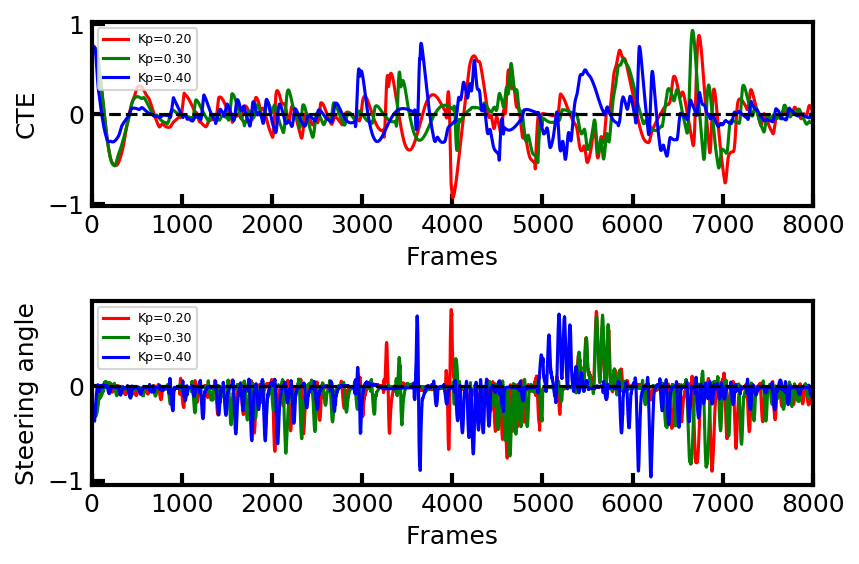

In [330]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6, 4),dpi=150, facecolor='w', edgecolor='k')
fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

plt.rc('axes',edgecolor='k',linewidth=2,labelsize=12, titlesize=10)
plt.rc('xtick',labelsize=12)
plt.rc('xtick.major', size=6, width=2)
plt.rc('ytick',labelsize=12)
plt.rc('ytick.major', size=6, width=2)

max_frames=8000;
N = 6
cm = plt.cm.get_cmap('Blues',N)
col = cm(range(N))[:,:-1]
col = ['r','g','b']
step = 50
for c,d in enumerate(['0.20','0.30','0.40']):
    cte, steer = readctefile("./speed20/%s-0.005-40.txt"%d)
    plt.subplot(211)
    #plt.plot(np.arange(0,max_frames),cte[:max_frames],color=col[c],linewidth=1.5,label='Kp=%s'%d)
    y = scipy.signal.savgol_filter(cte[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Kp=%s'%d)
    plt.subplot(212)
    #plt.plot(np.arange(max_frames),steer[:max_frames],color=col[c],linewidth=0.5,alpha=0.1)
    y = scipy.signal.savgol_filter(steer[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Kp=%s'%d)
    
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.tick_params(direction='in')
    plt.plot([0,max_frames],[0,0],'k--'); plt.xlim([0,max_frames]); plt.legend(loc='upper left',fontsize=6)
    if i == 0: plt.ylabel('CTE')
    else: plt.ylabel('Steering angle')
    #plt.ylim([-1.2,1.2])
    plt.xlabel('Frames')
#plt.ylabel('CTE'); plt.xlabel('Frames')
plt.show()

## Vary I

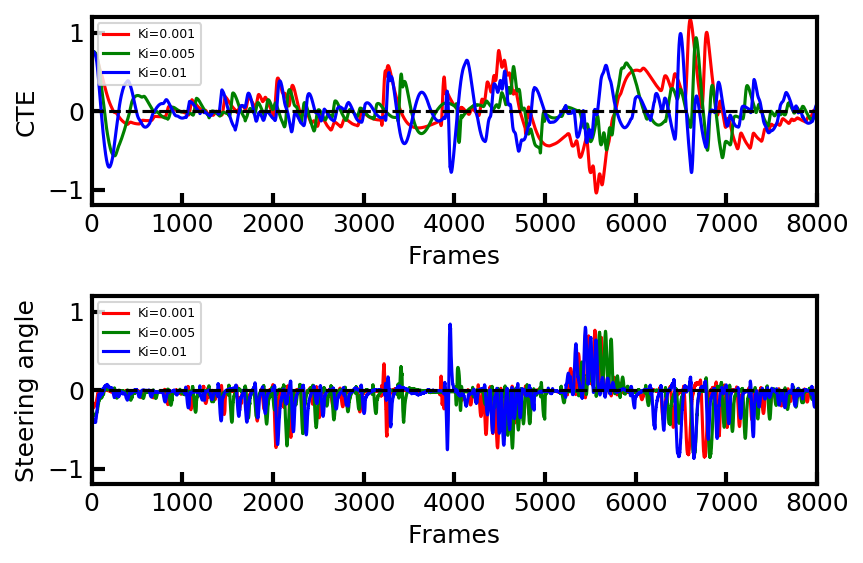

In [328]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6, 4),dpi=150, facecolor='w', edgecolor='k')
fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

plt.rc('axes',edgecolor='k',linewidth=2,labelsize=12, titlesize=10)
plt.rc('xtick',labelsize=12)
plt.rc('xtick.major', size=6, width=2)
plt.rc('ytick',labelsize=12)
plt.rc('ytick.major', size=6, width=2)

max_frames=8000;
N = 6
cm = plt.cm.get_cmap('Blues',N)
col = cm(range(N))[:,:-1]
col = ['r','g','b']
for c,d in enumerate(['0.001','0.005','0.01']): # 
    cte, steer = readctefile("./speed20/0.30-%s-40.txt"%d)
    plt.subplot(211)
    y = scipy.signal.savgol_filter(cte[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Ki=%s'%d)
    plt.subplot(212)
    #plt.plot(np.arange(max_frames),steer[:max_frames],color=col[c],linewidth=0.5,alpha=0.1)
    y = scipy.signal.savgol_filter(steer[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Ki=%s'%d)
    
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.tick_params(direction='in')
    plt.plot([0,max_frames],[0,0],'k--'); plt.xlim([0,max_frames]); plt.legend(loc='upper left',fontsize=6)
    #else: plt.legend(loc='upper left',fontsize=6); plt.ylim([0,max_frames]); plt.xlim([-1,1])
    #ax.set_aspect(1./ax.get_data_ratio())
    plt.ylim([-1.2,1.2])
    if i == 0: plt.ylabel('CTE')
    else: plt.ylabel('Steering angle')
    plt.xlabel('Frames')
plt.show()

## Vary D

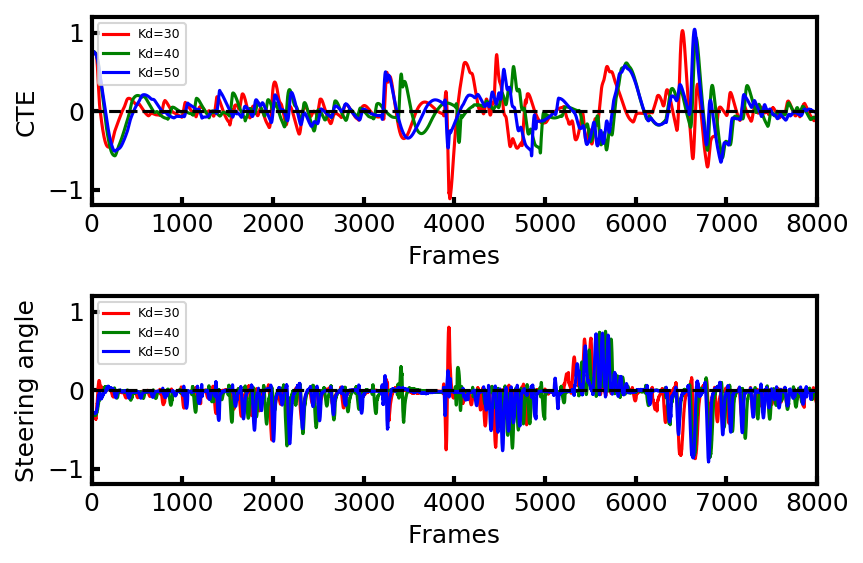

In [327]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6, 4),dpi=150, facecolor='w', edgecolor='k')
fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

plt.rc('axes',edgecolor='k',linewidth=2,labelsize=12, titlesize=10)
plt.rc('xtick',labelsize=12)
plt.rc('xtick.major', size=4, width=2)
plt.rc('ytick',labelsize=12)
plt.rc('ytick.major', size=4, width=2)

N = 6
max_frames=8000;
cm = plt.cm.get_cmap('Blues',N)
col = cm(range(N))[:,:-1]
col = ['r','g','b']
for c,d in enumerate([30,40,50]):
    cte,steer = readctefile("./speed20/0.30-0.005-%d.txt"%d)
    plt.subplot(211)
    y = scipy.signal.savgol_filter(cte[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Kd=%d'%d)
    plt.subplot(212)
    y = scipy.signal.savgol_filter(steer[:max_frames],51,2)
    plt.plot(y,color=col[c],linewidth=1.5,label='Kd=%d'%d)
    
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.tick_params(direction='in')
    plt.legend(loc='upper left',fontsize=6)
    plt.plot([0,max_frames],[0,0],'k--')
    plt.xlim([0,max_frames])
    if i == 0: plt.ylabel('CTE')
    else: plt.ylabel('Steering angle')
    plt.xlabel('Frames')
    plt.ylim([-1.2,1.2])
    #ax.set_aspect(1./ax.get_data_ratio())
plt.show()